# Check imputation accuracy

## Analysis

### Import libraries

In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt 
from IPython.display import display
from tqdm import tqdm_notebook
import tqdm
import seaborn as sns

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import  IterativeImputer 
from sklearn.impute import SimpleImputer , KNNImputer
from sklearn.preprocessing import Normalizer
sns.set(font_scale=1.3, rc={'axes.facecolor':'white', 'figure.facecolor':'white' , 'axes.grid':True} , style="whitegrid")

%load_ext autoreload
%autoreload 2

### Imputation comparison

In [114]:
x = pd.read_csv('compiled_data_v3/x_phot_minmax.csv' , index_col='name')
from choices import param_dict
ch = [
'b-csc',
"m-csc",
's-csc',
'u-csc']
id_df = pd.read_csv('compiled_data_v3/id_frame.csv' , index_col='name')
id_cols = id_df.columns.to_list()
x = pd.merge(id_df , x , left_index=True , right_index = True , how = 'left')
x = x[x['offset']<1.01]

x = x[param_dict['hardness']+param_dict['variability']+ch+param_dict['MW']+param_dict['color']]

x['missing'] = (100*x.isna().sum(axis=1) / x.shape[1]).to_list() 
x_dense = x[x['missing']<100].drop(columns=['missing']+param_dict['hardness'])
x_dense

,var_inter_prob_b,var_inter_sigma_b,var_intra_prob_b,var_inter_index_b,kp_intra_prob_b,var_intra_index_b,b-csc,m-csc,s-csc,u-csc,...,W1-W2,B-R,G-J,G-W2,Bp-H,Bp-W3,Rp-K,J-H,J-W1,W1-W2
name,,,,,,,,,,,,,,,,,,,,,
2CXO J002359.4-720438,2.632625,0.000904,5.046627,0.00,8.195828,1.0,0.000345,0.000446,0.000276,0.000140,...,NaN,2.894845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J174041.4-534004,9.999996,0.017956,1.995495,10.00,8.236122,0.0,0.054905,0.065857,0.040891,0.004881,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J002409.2-720543,9.999844,0.001090,6.298061,7.50,8.909807,1.0,0.001753,0.000648,0.001476,0.002739,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J002411.1-720620,8.302307,0.026969,8.383567,6.25,9.841010,2.0,0.004952,0.001471,0.002686,0.008907,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J002401.4-720441,5.005657,0.000442,7.272317,3.75,9.850364,2.0,0.000386,0.000579,0.000374,0.000131,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2CXO J003444.5-431554,NaN,NaN,3.074255,NaN,0.408315,0.0,0.010893,0.004661,0.005908,0.016989,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CXO J203606.3+422737,NaN,NaN,3.363494,NaN,8.996703,0.0,0.006719,0.001328,0.002974,0.014401,...,NaN,4.953001,7.119828,NaN,6.445148,NaN,6.807378,5.048179,NaN,NaN
2CXO J131747.5+411745,NaN,NaN,1.768983,NaN,2.472603,0.0,0.044660,0.033835,0.040240,0.034558,...,6.731328,2.122574,NaN,5.055027,NaN,4.955872,NaN,NaN,NaN,6.731328


In [108]:
col = x_dense.isna().sum(axis=0)
col

var_inter_prob_b      3875
var_inter_sigma_b     3875
var_intra_prob_b       391
var_inter_index_b     3875
kp_intra_prob_b        391
var_intra_index_b      391
b-csc                  114
m-csc                  369
s-csc                  283
u-csc                  329
J                     3474
H                     3475
K                     3360
u-sdss                5890
g-sdss                5816
r-sdss                5878
i-sdss                5876
z-sdss                5887
FUV                   6385
NUV                   6367
G                     3080
Bp                    3080
Rp                    3080
W1                    4535
W2                    4532
W3                    4528
W4                    4501
4.5 microns (IRAC)    4325
8.0 microns (IRAC)    4574
3.6 microns (IRAC)    4447
5.8 microns (IRAC)    4447
B-R                   3080
G-J                   4425
G-W2                  5514
Bp-H                  4425
Bp-W3                 5510
Rp-K                  4406
J

In [115]:
def intro_nan(x_dense):
    i_rand = np.random.randint(0 , x_dense.shape[0] , 150000)
    j_rand = np.random.randint(0 , x_dense.shape[1] , 150000)
    xn = x_dense.copy()

    for i, j in zip(i_rand,j_rand):
        xn.iloc[i,j] = np.nan
    xn
    return xn , i_rand , j_rand

out of 7700*49 = 377300 cells ,
number of originally missing cells - 193906 (~ 51%)
NUmber of artificially introduced empty cells - 42703

In [116]:
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor
RN = 99887
estim = RandomForestRegressor(n_jobs=-1 , random_state=RN)
imp = IterativeImputer(
    estimator = estim , 
    verbose=0 ,
    max_iter = 1 ,
    random_state= RN , 
)


imp_const = SimpleImputer(strategy='constant' , fill_value=0)
from missingpy import MissForest
imp_dict = {
    'mode' : SimpleImputer(strategy='most_frequent') , 
    'mean' : SimpleImputer(strategy='mean'), 
    'const' : imp_const , 
    'reg' : imp  , 
    #'knn' : KNNImputer(weights='distance') , 
    'forest reg' : MissForest(),
}
imp_list = ['mean' , 'mode' ,'forest reg']

In [138]:
df_all = []
from tqdm import tqdm 
df = []
for im in imp_list:
    #print(im)
    imputer = imp_dict[im]
    xn , i_rand , j_rand = intro_nan(x_dense)
    x_imp = imputer.fit_transform(xn)
    true_val = [x_dense.iloc[i,j] for i,j in zip(i_rand , j_rand)]
    pred_val = [x_imp[i,j] for i,j in zip(i_rand , j_rand)]
    diff = [(t-p)/t if t!=0 and t!=np.nan else np.nan for t, p in zip(true_val , pred_val)]
    diff = pd.DataFrame({
        'imputation' : im , 
        'error' : diff 
    })
    df.append(diff)
df_all.append(df)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5


In [117]:

from tqdm import tqdm 
def calc_err(im):
    #print(im)
    df_all = []
    df = []
    imputer = imp_dict[im]
    xn , i_rand , j_rand = intro_nan(x_dense)
    x_imp = imputer.fit_transform(xn)
    true_val = [x_dense.iloc[i,j] for i,j in zip(i_rand , j_rand)]
    pred_val = [x_imp[i,j] for i,j in zip(i_rand , j_rand)]
    diff = [(t-p)/t if t!=0 and t!=np.nan else np.nan for t, p in zip(true_val , pred_val)]
    diff = pd.DataFrame({
        'imputation' : im , 
        'error' : diff 
    })
    #df.append(diff)
    return diff


In [125]:
mode_err , mode_std = [] , []
for i in tqdm(range(4)):
    temp = calc_err('mode')
    temp_lim = temp[temp['error']<1]
    temp_lim = temp_lim[temp_lim['error']>-1]
    mode_err.append(temp_lim.mean())
mode_err

100%|██████████| 4/4 [01:10<00:00, 17.59s/it]


[error    0.325029
 dtype: float64,
 error    0.308047
 dtype: float64,
 error    0.377982
 dtype: float64,
 error    0.340735
 dtype: float64]

In [126]:
mean_err , mean_std = [] , []
for i in tqdm(range(4)):
    temp = calc_err('mean')
    temp_lim = temp[temp['error']<1]
    temp_lim = temp_lim[temp_lim['error']>-1]
    mean_err.append(temp_lim.mean())
mean_err

100%|██████████| 4/4 [01:10<00:00, 17.63s/it]


[error   -0.00017
 dtype: float64,
 error   -0.000483
 dtype: float64,
 error   -0.001325
 dtype: float64,
 error    0.00131
 dtype: float64]

In [128]:
f_err , f_std = [] , []
for i in tqdm(range(4)):
    temp = calc_err('forest reg')
    temp_lim = temp[temp['error']<1]
    temp_lim = temp_lim[temp_lim['error']>-1]
    f_err.append(temp_lim.mean())
f_err

  0%|          | 0/4 [00:00<?, ?it/s]

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4


 25%|██▌       | 1/4 [03:19<09:59, 199.88s/it]

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6


 50%|█████     | 2/4 [07:55<08:09, 244.51s/it]

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3


 75%|███████▌  | 3/4 [10:39<03:27, 207.46s/it]

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5


100%|██████████| 4/4 [14:38<00:00, 219.59s/it]


[error   -0.00267
 dtype: float64,
 error   -0.004094
 dtype: float64,
 error   -0.00351
 dtype: float64,
 error   -0.003428
 dtype: float64]

In [140]:
for i in range(len(df_all)):
    df_all[i] = pd.concat(df_all[i]).reset_index(drop=True)
df_all[0]

,imputation,error
0,mean,NaN
1,mean,NaN
2,mean,NaN
3,mean,0.364305
4,mean,0.782006
...,...,...
449995,forest reg,-0.005626
449996,forest reg,NaN
449997,forest reg,-0.000457
449998,forest reg,NaN


In [141]:
df_all[0].isna().sum(axis=0)

imputation         0
error         236389
dtype: int64

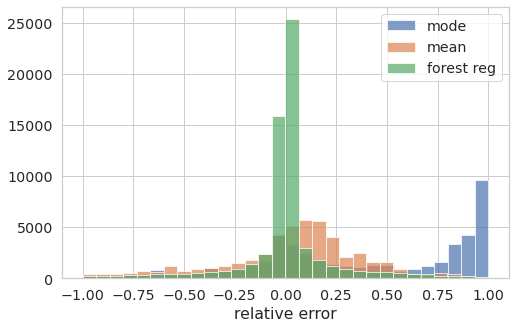

In [175]:
#fig , ax = plt.subplots(nrows=4,  ncols=2 , figsize = (10,8))
df_temp = df_all[0][df_all[0]['error']>-1]
df_temp = df_temp[df_temp['error']<1]
#df_temp = df_err.copy()
imp_plot_list = ['mode'  , 'mean' , 'forest reg']
#plt.set_cmap('icefire')
sns.set_theme('paper')
sns.set(font_scale=1.3, rc={'axes.facecolor':'white', 'figure.facecolor':'white' , 'axes.grid':True} , style="whitegrid")
plt.figure(figsize=(8,5))
for i in imp_plot_list:
    plt.hist(df_temp[df_temp['imputation']==i]['error'] , label=i , alpha=0.7 , bins=30)
#lt.xlim(-50 , 50)
plt.legend()
#plt.savefig('plots/pred_acc_err_hist.png')
plt.xlabel('relative error')
plt.savefig('plots/imp_study/imputation_error.jpg')
plt.show()

regression relative error is much smaller than that of mean and mode error. 
But then again the question is why does this mean and mode imputation performs at par or even better with regression. See below for 

### Classification accuracy comparison

#### Train and validate

In [2]:
%%time
from utilities import deets
from choices import get_train_data , param_dict
classes = ['AGN' ,'STAR' , 'YSO' ,  'CV' , 'LMXB' , 'HMXB' ,'ULX','PULSAR']
flag = {
    'conf_flag' : 0 , 
    'streak_src_flag' : 0 , 
    'extent_flag' : 0 , 
    'pileup_flag' : 0 , 
    }
ret_dict= {'clf': False,
 'prob_table': True,
 'acc': True,
 'pr_score': True,
 'precision': True,
 'recall': True , 
 'roc_auc_score' : True
 }

CPU times: user 17 µs, sys: 14 µs, total: 31 µs
Wall time: 40.5 µs


In [60]:
from tqdm import tqdm
for d in tqdm(['forest' , 'mean' , 'mode' , 'knn']):
    file = f'compiled_data_v3/imputed_data_v2/x_phot_minmax_{d}imp.csv'
    data = get_train_data(flags = flag, classes= classes , offset = 1, file=file)
    data = data.drop(columns = param_dict['hardness'])
    deets(data,1)
    from utilities import cv
    from sklearn.ensemble import GradientBoostingClassifier
    gb = GradientBoostingClassifier()
    res_final , _ , _  = cv(
        {'data' : data , 'name' : f'data_{d}_imp'}, 
        {'model' : 'RF' , 'name' :'RF'} ,
        k=10 , return_dict = ret_dict, save_df=1)

  0%|          | 0/4 [00:00<?, ?it/s]

offset:  	0.000|1.010
singinficance:  1.000|267.938
True
_____________________________________________________
------------------------------
Number of Objects : 7703
Number of Columns : 46
------------------------------


STAR      2790
AGN       2395
YSO       1149
HMXB       748
ULX        211
CV         166
LMXB       143
PULSAR     101
Name: class, dtype: int64

_____________________________________________________
Doing 10 fold cross-validation.


 25%|██▌       | 1/4 [00:17<00:53, 17.83s/it]

Overall Accuracy : 0.8800467350382968
offset:  	0.000|1.010
singinficance:  1.000|267.938
True
_____________________________________________________
------------------------------
Number of Objects : 7703
Number of Columns : 46
------------------------------


STAR      2790
AGN       2395
YSO       1149
HMXB       748
ULX        211
CV         166
LMXB       143
PULSAR     101
Name: class, dtype: int64

_____________________________________________________
Doing 10 fold cross-validation.


 50%|█████     | 2/4 [00:28<00:26, 13.48s/it]

Overall Accuracy : 0.8951058029339218
offset:  	0.000|1.010
singinficance:  1.000|267.938
True
_____________________________________________________
------------------------------
Number of Objects : 7703
Number of Columns : 46
------------------------------


STAR      2790
AGN       2395
YSO       1149
HMXB       748
ULX        211
CV         166
LMXB       143
PULSAR     101
Name: class, dtype: int64

_____________________________________________________
Doing 10 fold cross-validation.


 75%|███████▌  | 3/4 [00:38<00:11, 11.96s/it]

Overall Accuracy : 0.8975723743995846
offset:  	0.000|1.010
singinficance:  1.000|267.938
True
_____________________________________________________
------------------------------
Number of Objects : 7703
Number of Columns : 46
------------------------------


STAR      2790
AGN       2395
YSO       1149
HMXB       748
ULX        211
CV         166
LMXB       143
PULSAR     101
Name: class, dtype: int64

_____________________________________________________
Doing 10 fold cross-validation.


100%|██████████| 4/4 [00:55<00:00, 13.81s/it]

Overall Accuracy : 0.8813449305465403


#### Confusion matrix

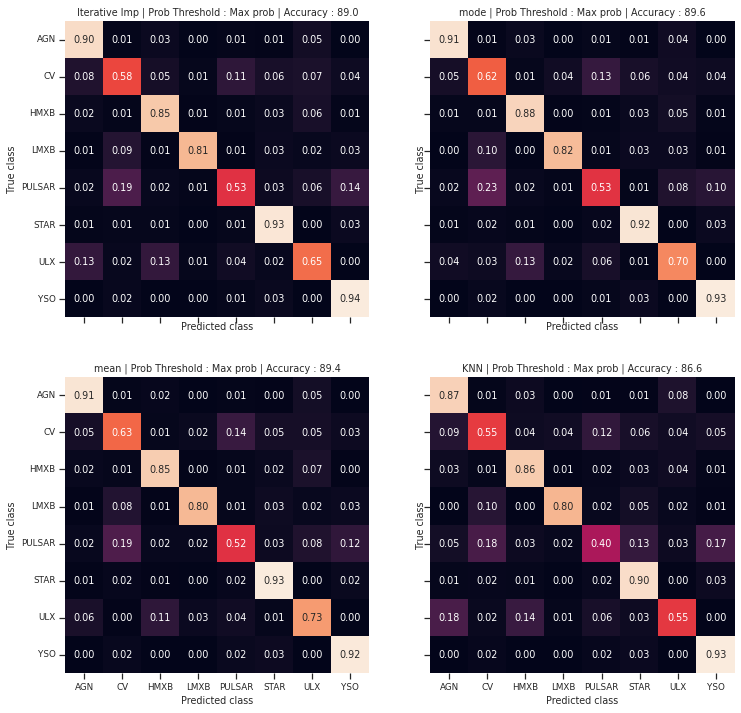

In [12]:
from utilities import plot_cf
plot_dict_def = {
    'title' : True , 
    'font_scale' : 0.8 , 
    'cbar' : False ,
    'plot_num' : False,
}
fig , ax = plt.subplots(nrows=2, ncols=2, figsize = (12,12) , sharex=True , sharey=True,)
plot_cf('data_forest_imp' , 'GB' , k=10 ,ax=ax[0][0] ,plot_dict=plot_dict_def , label = 'Iterative Imp')
plot_cf('data_mode_imp' , 'GB' , k=10 ,ax=ax[0][1] ,plot_dict=plot_dict_def , label  = 'mode')
plot_cf('data_mean_imp' , 'GB' , k=10 ,ax=ax[1][0] ,plot_dict=plot_dict_def , label  = 'mean') 
plot_cf('data_knn_imp' , 'GB' , k=10 ,ax=ax[1][1] ,plot_dict=plot_dict_def , label  = 'KNN') 

#### Score

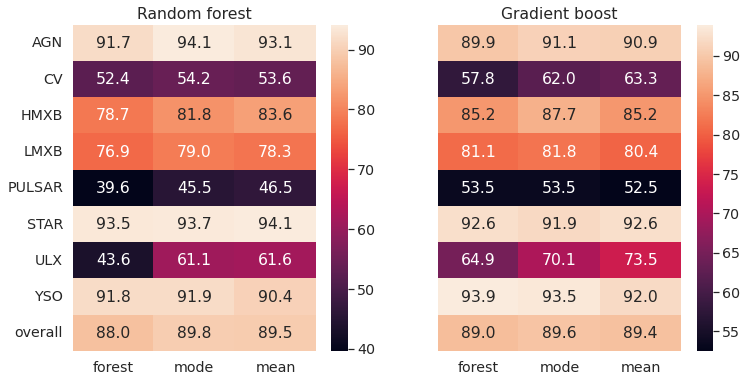

In [5]:
from utilities import get_score
fig , ax = plt.subplots(nrows=1, ncols=2, figsize = (12,6) , sharey=True,)
methods =  ['forest' , 'mode','mean',]
cl = []

mat = []
for i in methods:
    temp = get_score(f'data_{i}_imp' , 'RF' , k=10 ,)
    mat.append(temp['class_scores']['recall_score'].to_list()+[temp['accuracy']])
    cl = temp['classes']
cl = np.append(cl ,'overall')
mat = np.asarray(mat).T
sns.heatmap(mat*100 , annot=True , fmt='.1f' , ax=ax[0],xticklabels=methods , yticklabels=cl , cbar=True)
ax[0].set_title('Random forest')
ax[0].tick_params(axis='y', rotation=0)

mat = []
for i in methods:
    temp = get_score(f'data_{i}_imp' , 'GB' , k=10 ,)
    mat.append(temp['class_scores']['recall_score'].to_list()+[temp['accuracy']])
    cl = temp['classes']
cl = np.append(cl ,'overall')
mat = np.asarray(mat).T
sns.heatmap(mat*100 , annot=True , fmt='.1f' , ax=ax[1],xticklabels=methods , yticklabels=cl , cbar=True)
ax[1].set_title('Gradient boost')
plt.savefig('plots/imp_study/acc_com.jpg')
plt.show()

## Result

<table><tr>
    <td><img src = 'plots/imp_study/imputation_error.png'></td>
    <td><img src = 'plots/imp_study/acc_com.jpg'></td>
</tr></table>


### Observation

*   Mode imputation is nor able to fill in missing values with good accuracy
*   Regression can predict missing values with very low error
*   Random forest classifier works poor than Gradient Boost classifier
*   regression imputation gives lower classification accuracy for all the classes in all cases.

### Conclusion

*   even with not good predicted values median is able to perform better, which means that the true values are actually confusing the classifier, so some features are actually degrading classifier performance
*   we need to identify those features and eliminate them, then we can do more improvement of classification accuracy

# Training data cross-check

In [170]:
import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot as plt 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [175]:
from utilities import deets
from choices import get_train_data
classes = ['AGN' ,'STAR' , 'YSO' ,  'CV' , 'LMXB' , 'HMXB' ,'ULX' ,'PULSAR']
flag = {
    'conf_flag' : 0 , 
    'streak_src_flag' : 0 , 
    'extent_flag' : 0 , 
    'pileup_flag' : 0 , 
    }
ret_dict =  {
    'clf' : False , 
    'prob_table' : True , 
    'acc' : True , 
    'pr_score' : True , 
    #'recall' : True ,
}
data = get_train_data(flags = flag, classes= classes , sig = 5 , offset=1)
data 

max offset: 1.009714527096731
max offset: 267.9379420657924


,class,gal_b2,gal_l2,hard_hs,hard_hm,hard_ms,var_inter_prob_b,var_inter_sigma_b,var_intra_prob_b,var_inter_index_b,...,Rp,B-R,G-J,G-W2,Bp-H,Bp-W3,Rp-K,J-H,J-W1,W1-W2
name,,,,,,,,,,,,,,,,,,,,,
2CXO J174041.4-534004,CV,4.327881,9.393618,0.18750,0.98125,1.52500,9.999996,0.017956,1.995495,10.00,...,4.784757,2.046031,0.0,0.000000,0.0,0.000000,0.0,3.044488,3.770285,5.160401
2CXO J002409.2-720543,CV,2.488746,8.496825,4.08750,5.45000,3.66875,9.999844,0.001090,6.298061,7.50,...,4.784757,2.046031,0.0,0.000000,0.0,0.000000,0.0,3.044488,3.770285,5.160401
2CXO J002411.1-720620,CV,2.489281,8.496673,4.53750,6.46250,3.13125,8.302307,0.026969,8.383567,6.25,...,4.784757,2.046031,0.0,0.000000,0.0,0.000000,0.0,3.044488,3.770285,5.160401
2CXO J002401.4-720441,CV,2.487878,8.497314,0.00000,0.00000,1.57500,5.005657,0.000442,7.272317,3.75,...,4.784757,2.046031,0.0,0.000000,0.0,0.000000,0.0,3.044488,3.770285,5.160401
2CXO J002410.0-720441,CV,2.487775,8.496884,2.61250,5.83750,2.03125,0.925891,0.003753,7.197596,0.00,...,4.784757,2.046031,0.0,0.000000,0.0,0.000000,0.0,3.044488,3.770285,5.160401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2CXO J091752.5+414529,AGN,7.475891,4.996231,4.62500,6.47500,3.21250,9.972262,0.011508,3.623863,10.00,...,4.784757,2.046031,0.0,0.000000,0.0,0.000000,0.0,3.044488,3.770285,6.615539
2CXO J100113.8+014000,AGN,7.339858,6.598881,2.71875,3.45625,4.20000,6.371689,0.001190,6.095798,5.00,...,4.784757,2.046031,0.0,0.000000,0.0,0.000000,0.0,3.044488,3.770285,6.220050
2CXO J131747.5+411745,AGN,9.176328,2.880393,1.73750,4.05625,2.45000,10.000000,0.000000,1.768983,6.25,...,8.002279,2.122574,0.0,5.055027,0.0,4.955872,0.0,3.044488,3.770285,6.731328


In [176]:
default_data = 'compiled_data_v3/id_frame.csv'
data_flg = pd.read_csv('compiled_data_v3/id_frame.csv')
data_flg = data_flg.drop_duplicates('name')
data_flg = data_flg.drop_duplicates('cat_name')
data_flg = data_flg.set_index('name')
data_mg = pd.merge(data.drop(columns=['class']) , data_flg , left_index=True , right_index=True ,how = 'left')
data_mg = data_mg[['ra','dec', 'offset', 'cat_ra' , 'cat_dec' , 'cat_name' ,'catalog' , 'class' ,]]
data_mg = data_mg.rename(columns={'class' : 'our_class'})
data_mg 

,ra,dec,offset,cat_ra,cat_dec,cat_name,catalog,our_class
name,,,,,,,,
2CXO J174041.4-534004,265.172853,-53.667935,0.000230,265.172853,-53.667935,1WGA J1740.6-5340,hea,CV
2CXO J002409.2-720543,6.038483,-72.095544,0.000235,6.038483,-72.095544,CXOGLB J002409.2-720543,hea,CV
2CXO J002411.1-720620,6.046367,-72.105583,0.000313,6.046367,-72.105583,CXOGLB J002411.0-720620,hea,CV
2CXO J002401.4-720441,6.005988,-72.078311,0.000319,6.005988,-72.078311,CXOGLB J002401.4-720441,hea,CV
2CXO J002410.0-720441,6.042059,-72.078131,0.000486,6.042059,-72.078131,CXOGLB J002410.0-720441,hea,CV
...,...,...,...,...,...,...,...,...
2CXO J091752.5+414529,139.468985,41.758071,1.007483,139.469200,41.758300,SDSS J09178+4145,VERONCAT,AGN
2CXO J100113.8+014000,150.307708,1.666888,1.007875,150.307500,1.666700,COSM J10012+0140,VERONCAT,AGN
2CXO J131747.5+411745,199.448025,41.295864,1.009359,199.447900,41.295600,SDSS J13177+4117,VERONCAT,AGN


In [177]:
dfmw = pd.read_csv('compiled_data/TD/CSC_TD_MW_demo.csv')
#dfmw.columns.to_list()


/home/shivam/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (314,315,316,317) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [178]:
dfmw = dfmw[['name' , 'Class' , 'SubClass','ref','sep',]]
dfmw = dfmw.rename(columns = 
    {
        'Class' : 'mw_class',
        'SubClass' : 'mw_subclass' , 
        'ref' : 'mw_ref' ,
    }).set_index('name')
dfmw = dfmw.replace({
    'LM-STAR' : 'STAR' , 
    'HM-STAR' : 'STAR' , 
    'NS' : 'PULSAR'
})
dfmw 

,mw_class,mw_subclass,mw_ref,sep
name,,,,
2CXO J000009.3+135618,AGN,Q,2010A&A...518A..10V,0.604358
2CXO J000230.7+004959,AGN,Q,2010A&A...518A..10V,0.211831
2CXO J000622.6-000424,AGN,Q,2010A&A...518A..10V,0.583280
2CXO J000659.2-001740,AGN,Q,2010A&A...518A..10V,0.789596
2CXO J000703.6+155423,AGN,A,2010A&A...518A..10V,0.669382
...,...,...,...,...
2CXO J183000.6+011340,YSO,III,2007A&A...463..275G,0.662471
2CXO J183001.1+011324,YSO,I/II,2007A&A...463..275G,0.183368
2CXO J183003.4+011619,YSO,II,2007A&A...463..275G,0.212826


In [179]:
import numpy as np 
df_comp = pd.merge(data_mg , dfmw , left_index=True , right_index=True , how='inner')
df_comp.insert(0 , 'ok' , [1 if el1==el2 else (2 if el1==np.NaN or el2==np.NaN else 0) for el1, el2 in zip(df_comp['mw_class'] , df_comp['our_class'])])
df_comp.to_csv('cat-cross-match/matched_sources.csv' , index = True)
df_comp

,ok,ra,dec,offset,cat_ra,cat_dec,cat_name,catalog,our_class,mw_class,mw_subclass,mw_ref,sep
name,,,,,,,,,,,,,
2CXO J020052.2-092431,1,30.217678,-9.408798,0.000791,30.217678,-9.408798,2XMM J020052.2-092431,hea,CV,CV,IBWD,2005JAD....11....2D,0.091019
2CXO J231518.9-591028,1,348.828827,-59.174549,0.001220,348.828827,-59.174549,2XMM J231519.0-591029,hea,CV,CV,AM,2005JAD....11....2D,0.760212
2CXO J083642.7+532838,1,129.177966,53.477267,0.001673,129.177966,53.477267,1WGA J0836.7+5328,hea,CV,CV,UGSU/DQ,2005JAD....11....2D,0.267977
2CXO J190109.3-220005,1,285.288993,-22.001639,0.001791,285.288993,-22.001639,2XMM J190109.3-220003,hea,CV,CV,NaN,2005JAD....11....2D,0.611628
2CXO J193840.1+303028,1,294.667085,30.507841,0.001911,294.667085,30.507841,XMMSL2 J193839.8+303027,hea,CV,CV,UGZ,2005JAD....11....2D,0.143474
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2CXO J033130.5-275143,1,52.877428,-27.862157,0.953056,52.877500,-27.861900,ECDF-S 340,VERONCAT,AGN,AGN,Q,2010A&A...518A..10V,0.800177
2CXO J084052.1+131823,1,130.217223,13.306390,0.971572,130.217500,13.306400,CXOMP J08408+1318,VERONCAT,AGN,AGN,A,2010A&A...518A..10V,0.970904
2CXO J112320.4+535631,1,170.835005,53.942171,0.975908,170.835000,53.941900,SDSS J11233+5356,VERONCAT,AGN,AGN,Q,2010A&A...518A..10V,0.817521


In [180]:
df_comp['mw_class'].value_counts()

AGN       786
YSO       278
STAR      150
LMXB       34
PULSAR     22
CV         19
HMXB       12
Name: mw_class, dtype: int64

In [181]:
df_comp['our_class'].value_counts()

AGN       783
STAR      428
PULSAR     38
HMXB       15
YSO        14
CV         12
LMXB        9
ULX         2
Name: our_class, dtype: int64

In [146]:
from sklearn.metrics import confusion_matrix

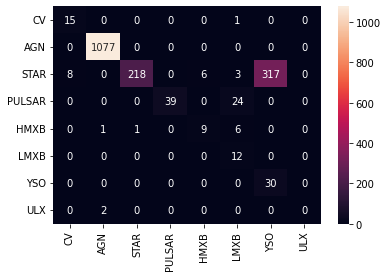

In [148]:
labels = df_comp['our_class'].unique()
cm = confusion_matrix(df_comp['our_class'] , df_comp['mw_class'] , labels=labels)
cm 
sns.heatmap(cm , annot=True , fmt='.0f' , xticklabels=labels, yticklabels=labels)
plt.show()

## Let's check the source

In [51]:
id = pd.read_csv('compiled_data/imputed/id_frame.csv')
id 

,name,catalog,class,cat_name,var_flag,streak_src_flag,pileup_flag,ra,dec,offset,missing,conf_flag,extent_flag,significance,sat_src_flag
0,2CXO J000002.8-251139,VERONCAT,AGN,XMM J00000-2511,0,0,0,0.011846,-25.194360,3.450889,0.641791,0.0,0,2.971429,0.0
1,2CXO J000002.9-350332,VERONCAT,AGN,MS 23574-3520,0,0,0,0.012318,-35.059068,1.880470,0.447761,0.0,1,16.266113,0.0
2,2CXO J000009.3+135618,VERONCAT,AGN,SDSS J00001+1356,0,0,0,0.039115,13.938493,0.756034,0.477612,0.0,0,1.948718,0.0
3,2CXO J000015.4+005246,VERONCAT,AGN,SDSS J00002+0052,0,0,0,0.064509,0.879593,0.768727,0.492537,0.0,1,6.031108,0.0
4,2CXO J000021.0-250812,VERONCAT,AGN,XMM J00003-2508,1,0,0,0.087880,-25.136909,1.561080,0.597015,0.0,0,4.258065,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13739,2CXO J235942.1-345953,HEA,STAR,HD 224664,0,0,0,359.925738,-34.998164,0.609451,0.492537,0.0,0,5.707223,0.0
13740,2CXO J235953.4-093655,VERONCAT,AGN,SDSS J23598-0936,0,0,0,359.972659,-9.615479,0.855571,0.373134,0.0,0,6.302814,0.0
13741,2CXO J235953.6-124148,VERONCAT,AGN,QSO J2359-12,0,0,0,359.973544,-12.696711,1.092917,0.492537,0.0,0,3.647059,0.0
13742,2CXO J235956.2-251017,VERONCAT,AGN,ABELL 2690#075,0,0,0,359.984373,-25.171423,5.425836,0.477612,0.0,0,3.294118,0.0


# Prob-missing 

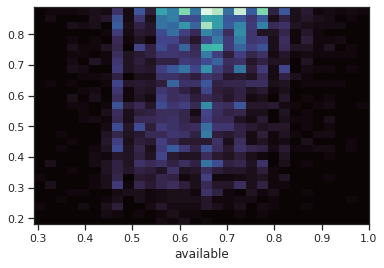

,predicted Prob,missing
predicted Prob,1.000000,-0.175875
missing,-0.175875,1.000000


In [3]:
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns
sns.set()
pred = pd.read_csv('predicted_table.csv')[['name' , 'predicted Prob']].set_index('name')
pred = pred[pred['predicted Prob']<0.9]
id = data_id = pd.read_csv('compiled_data_v3/id_frame.csv' , index_col='name')[['missing']]
df = pd.merge(pred , id , left_index=True , right_index=True)
df 
sns.set(font_scale=1, rc={'axes.facecolor':'white', 'figure.facecolor':'white' , 'axes.grid':True} , style="ticks")
#plt.hist2d(1-df['missing'] , df['predicted Prob']  ,cmap='icefire', )
plt.hist2d(1-df['missing'] , df['predicted Prob']  , cmap = 'mako' , bins=30)
#plt.scatter(1-df['missing'] , df['predicted Prob'] ,cmap='icefire' , s=2)
plt.xlabel('available')
plt.show()
df.corr()


,predicted Prob,missing
predicted Prob,1.000000,-0.062612
missing,-0.062612,1.000000


# Count numbers

In [1]:
import pandas as pd 
%load_ext autoreload
%autoreload 2

In [2]:
from choices import get_train_data
from utilities import deets

max offset: 9.998529125027682
max offset: 267.9379420657924
max offset: 2.0095520376532923
max offset: 267.9379420657924


In [3]:
from utilities import deets
from choices import get_train_data
classes = ['AGN' ,'STAR' , 'YSO' ,  'CV' , 'LMXB' , 'HMXB' ,'ULX' ,'PULSAR']
flag = {
    'conf_flag' : 0 , 
    'streak_src_flag' : 0 , 
    'extent_flag' : 0 , 
    'pileup_flag' : 0 , 
    #'var_flag' : 1, 
    }
ret_dict =  {
    'clf' : False , 
    'prob_table' : True , 
    'acc' : True , 
    'pr_score' : True , 
    #'recall' : True ,
}
data = get_train_data(flags = flag, classes= classes , sig = 0 , offset = 4)
deets(data,1)

max offset: 4.006180798220715
max offset: 267.9379420657924
_____________________________________________________
------------------------------
Number of Objects : 11584
Number of Columns : 49
------------------------------


AGN       4721
STAR      3638
YSO       1573
HMXB       845
ULX        255
CV         248
LMXB       176
PULSAR     128
Name: class, dtype: int64

_____________________________________________________


# Feature Elimination

### Import libraries

In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt 
from IPython.display import display
from tqdm import tqdm_notebook
import tqdm
import seaborn as sns

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import  IterativeImputer 
from sklearn.impute import SimpleImputer , KNNImputer
from sklearn.preprocessing import Normalizer
sns.set(font_scale=1.3, rc={'axes.facecolor':'white', 'figure.facecolor':'white' , 'axes.grid':True} , style="whitegrid")

%load_ext autoreload
%autoreload 2

## Feature-feature Correlation

In [40]:
%%time
from utilities import deets
from choices import get_train_data , param_dict
classes = ['AGN' ,'STAR' , 'YSO' ,  'CV' , 'LMXB' , 'HMXB' ,'ULX','PULSAR']
flag = {
    'conf_flag' : 0 , 
    'streak_src_flag' : 0 , 
    'extent_flag' : 0 , 
    'pileup_flag' : 0 , 
    }
ret_dict= {
 'clf': True,
 'prob_table': False,
 'acc': True,
 'pr_score': True,
 'precision': True,
 'recall': True , 
 'roc_auc_score' : True
 }
from tqdm import tqdm
from utilities import cv
from sklearn.ensemble import GradientBoostingClassifier


CPU times: user 66 µs, sys: 0 ns, total: 66 µs
Wall time: 72.7 µs


In [50]:
file = f'compiled_data_v3/x_phot_minmax.csv'
sparse_col = ['0p5_2csc' , '2-10 keV (XMM)' , '1_2_csc' , '0p5_8_csc']
x = pd.read_csv(file , index_col='name').drop(columns=sparse_col)

In [51]:
# get list of columns and corresponding missing values
x_miss = x.isna().sum(axis=0).to_dict()


In [52]:
corr = x.corr().abs()
corr = corr.where(np.tril(np.ones(corr.shape),k=-1).astype(np.bool))
corr

,gal_b2,gal_l2,hard_hs,hard_hm,hard_ms,var_inter_prob_b,var_inter_sigma_b,var_intra_prob_b,var_inter_index_b,kp_intra_prob_b,...,Rp,B-R,G-J,G-W2,Bp-H,Bp-W3,Rp-K,J-H,J-W1,W1-W2
gal_b2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gal_l2,0.022208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hard_hs,0.009569,0.003371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hard_hm,0.032390,0.000912,0.686043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hard_ms,0.029889,0.018421,0.649972,0.122351,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
var_inter_prob_b,0.008530,0.033011,0.031092,0.062657,0.021777,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
var_inter_sigma_b,0.034009,0.051501,0.036080,0.044823,0.012313,0.090231,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
var_intra_prob_b,0.101220,0.018790,0.061548,0.011741,0.067829,0.148308,0.030405,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
var_inter_index_b,0.013906,0.022891,0.030546,0.064504,0.021689,0.939901,0.116425,0.170906,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kp_intra_prob_b,0.033671,0.021202,0.007631,0.033255,0.023611,0.141148,0.026230,0.575122,0.168905,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
corr_pair = []
th = 0.8
for i in tqdm(corr.index.to_list()):
    for j in corr.columns.to_list():
        if(corr.loc[i,j]>th):
            corr_pair.append([i,j])
print(corr_pair)
to_drop = [el[0] if x_miss[el[0]]>x_miss[el[1]] else el[1] for el in corr_pair ]
to_drop = np.unique(to_drop)
corr[to_drop]

100%|██████████| 53/53 [00:00<00:00, 673.59it/s]

[['var_inter_index_b', 'var_inter_prob_b'], ['var_intra_index_b', 'var_intra_prob_b'], ['ks_intra_prob_b', 'kp_intra_prob_b'], ['m-csc', 'b-csc'], ['s-csc', 'b-csc'], ['u-csc', 'b-csc'], ['0p3_8_csc', 'b-csc'], ['0p3_8_csc', 'm-csc'], ['r-sdss', 'u-sdss'], ['i-sdss', 'r-sdss'], ['z-sdss', 'r-sdss'], ['z-sdss', 'i-sdss'], ['W1', 'r-sdss'], ['W1', 'i-sdss'], ['W1', 'z-sdss'], ['W2', 'r-sdss'], ['W2', 'i-sdss'], ['W2', 'z-sdss'], ['W2', 'W1'], ['W3', 'W1'], ['W3', 'W2'], ['J', 'r-sdss'], ['J', 'i-sdss'], ['J', 'z-sdss'], ['J', 'W1'], ['J', 'W2'], ['H', 'r-sdss'], ['H', 'i-sdss'], ['H', 'z-sdss'], ['H', 'W1'], ['H', 'W2'], ['H', 'J'], ['K', 'r-sdss'], ['K', 'z-sdss'], ['K', 'W1'], ['K', 'W2'], ['K', 'J'], ['K', 'H'], ['3.6 microns (IRAC)', '4.5 microns (IRAC)'], ['5.8 microns (IRAC)', '4.5 microns (IRAC)'], ['5.8 microns (IRAC)', '8.0 microns (IRAC)'], ['5.8 microns (IRAC)', '3.6 microns (IRAC)'], ['G', 'W1'], ['G', 'W2'], ['G', 'J'], ['G', 'H'], ['G', 'K'], ['Bp', 'u-sdss'], ['Bp', 'r-sds

,0p3_8_csc,3.6 microns (IRAC),5.8 microns (IRAC),8.0 microns (IRAC),Bp,Bp-H,Bp-W3,G,G-J,G-W2,...,i-sdss,kp_intra_prob_b,m-csc,r-sdss,s-csc,u-csc,u-sdss,var_inter_prob_b,var_intra_prob_b,z-sdss
gal_b2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gal_l2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hard_hs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hard_hm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hard_ms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
var_inter_prob_b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
var_inter_sigma_b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.090231,NaN,NaN
var_intra_prob_b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.148308,NaN,NaN
var_inter_index_b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.939901,0.170906,NaN
kp_intra_prob_b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.141148,0.575122,NaN


In [68]:
%%time
file = f'compiled_data_v3/imputed_data_v2/x_phot_minmax_modeimp.csv'
data = get_train_data(flags = flag, classes= classes , offset = 1, file=file)
feat_to_drop = np.unique(param_dict['hardness']+ list(to_drop))
feat_to_drop = np.unique(param_dict['hardness'] + param_dict['IRAC'])
columns = param_dict['hardness']+param_dict['IRAC']
#feat_to_drop = np.unique(param_dict['hardness'])
data = data.drop(columns = columns)
deets(data,1)
gb = GradientBoostingClassifier()
ret_dict= {
 'clf': False,
 'prob_table': True,
 'acc': True,
 'pr_score': True,
 'precision': True,
 'recall': True , 
 'roc_auc_score' : True
 }

res_final , _ , _  = cv(
    {'data' : data , 'name' : f'data_old_irac_feat_drop_mode'}, 
    {'model' : gb , 'name' :'GB'} ,
    k=10 , return_dict = ret_dict, save_df=1)


offset:  	0.000|1.010
singinficance:  1.000|267.938
_____________________________________________________
------------------------------
Number of Objects : 7703
Number of Columns : 42
------------------------------


STAR      2790
AGN       2395
YSO       1149
HMXB       748
ULX        211
CV         166
LMXB       143
PULSAR     101
Name: class, dtype: int64

_____________________________________________________
Doing 10 fold cross-validation.
Overall Accuracy : 0.8912112164091912
CPU times: user 1.52 s, sys: 811 ms, total: 2.33 s
Wall time: 3min 28s


In [92]:
res_final['recall']

0.7948669051693982

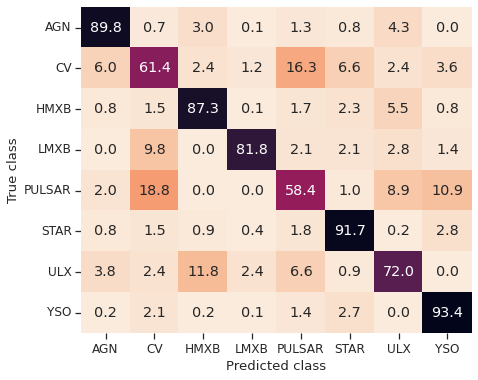

In [109]:
from utilities import plot_cf
fig , ax = plt.subplots(nrows=1, ncols=1 , figsize=(7,6))
plot_dict_def = {
    'title' : False , 
    'font_scale' : 1.2 , 
    'cbar' : False ,
    'plot_num' : False,
}
plot_cf([f'data_old_irac_feat_drop_mode' , 'GB'], k=10  , ax=ax , plot_dict=plot_dict_def)
plt.show()

In [72]:
data_dict = data['class'].value_counts().to_dict()


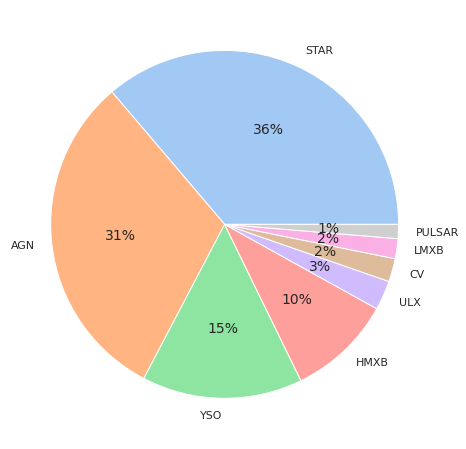

In [83]:
data_val = [15, 25, 25, 30, 5]
labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:len(data_dict)]

import matplotlib 
font = {
        #'weight' : 'nor',
        'size'   : 14}
matplotlib.rc('font', **font)
#create pie chart
plt.figure(figsize=(8,8))
plt.pie(data_dict.values(), labels = data_dict.keys(), colors = colors, autopct='%.0f%%')
plt.savefig('plots/train-dist.png')
plt.show()

## Elimination feature imortance

### Analysis

In [25]:
%%time
from utilities import deets
from choices import get_train_data , param_dict
classes = ['AGN' ,'STAR' , 'YSO' ,  'CV' , 'LMXB' , 'HMXB' ,'ULX','PULSAR']
flag = {
    'conf_flag' : 0 , 
    'streak_src_flag' : 0 , 
    'extent_flag' : 0 , 
    'pileup_flag' : 0 , 
    }
ret_dict= {
 'clf': True,
 'prob_table': False,
 'acc': True,
 'pr_score': True,
 'precision': True,
 'recall': True , 
 'roc_auc_score' : True
 }
from tqdm import tqdm
from utilities import cv
from sklearn.ensemble import GradientBoostingClassifier
feat_to_drop = ['base','WISE' , 'IRAC' , '2MASS' , 'GAIA' , 'color' , 'SDSS' , 'GALEX']
#feat_to_drop = ['base']
for d in tqdm(feat_to_drop):
    file = f'compiled_data_v3/imputed_data_v2/x_phot_minmax_modeimp.csv'
    data = get_train_data(flags = flag, classes= classes , offset = 1, file=file)
    if d=='base':
        data = data.drop(columns = param_dict['hardness']+param_dict[d])
    else:
        data = data.drop(columns = param_dict['hardness']+param_dict[d])
    deets(data,1)
    gb = GradientBoostingClassifier()
    res_final , _ , _  = cv(
        {'data' : data , 'name' : f'data_{d}_missing'}, 
        {'model' : gb , 'name' :'GB'} ,
        k=10 , return_dict = ret_dict, save_df=1)


  0%|          | 0/7 [00:00<?, ?it/s]

offset:  	0.000|1.010
singinficance:  1.000|267.938
True
_____________________________________________________
------------------------------
Number of Objects : 7703
Number of Columns : 42
------------------------------


STAR      2790
AGN       2395
YSO       1149
HMXB       748
ULX        211
CV         166
LMXB       143
PULSAR     101
Name: class, dtype: int64

_____________________________________________________
Doing 10 fold cross-validation.
Overall Accuracy : 0.8884850058418798
Classifier is :  GradientBoostingClassifier()


 14%|█▍        | 1/7 [02:50<17:03, 170.52s/it]

offset:  	0.000|1.010
singinficance:  1.000|267.938
True
_____________________________________________________
------------------------------
Number of Objects : 7703
Number of Columns : 42
------------------------------


STAR      2790
AGN       2395
YSO       1149
HMXB       748
ULX        211
CV         166
LMXB       143
PULSAR     101
Name: class, dtype: int64

_____________________________________________________
Doing 10 fold cross-validation.
Overall Accuracy : 0.8888744644943528
Classifier is :  GradientBoostingClassifier()


 29%|██▊       | 2/7 [05:38<14:05, 169.19s/it]

offset:  	0.000|1.010
singinficance:  1.000|267.938
True
_____________________________________________________
------------------------------
Number of Objects : 7703
Number of Columns : 43
------------------------------


STAR      2790
AGN       2395
YSO       1149
HMXB       748
ULX        211
CV         166
LMXB       143
PULSAR     101
Name: class, dtype: int64

_____________________________________________________
Doing 10 fold cross-validation.
Overall Accuracy : 0.8870569907828119
Classifier is :  GradientBoostingClassifier()


 43%|████▎     | 3/7 [08:29<11:19, 169.83s/it]

offset:  	0.000|1.010
singinficance:  1.000|267.938
True
_____________________________________________________
------------------------------
Number of Objects : 7703
Number of Columns : 43
------------------------------


STAR      2790
AGN       2395
YSO       1149
HMXB       748
ULX        211
CV         166
LMXB       143
PULSAR     101
Name: class, dtype: int64

_____________________________________________________
Doing 10 fold cross-validation.
Overall Accuracy : 0.8869271712319875
Classifier is :  GradientBoostingClassifier()


 57%|█████▋    | 4/7 [11:17<08:27, 169.30s/it]

offset:  	0.000|1.010
singinficance:  1.000|267.938
True
_____________________________________________________
------------------------------
Number of Objects : 7703
Number of Columns : 37
------------------------------


STAR      2790
AGN       2395
YSO       1149
HMXB       748
ULX        211
CV         166
LMXB       143
PULSAR     101
Name: class, dtype: int64

_____________________________________________________
Doing 10 fold cross-validation.
Overall Accuracy : 0.8903024795534208
Classifier is :  GradientBoostingClassifier()


 71%|███████▏  | 5/7 [13:57<05:31, 165.65s/it]

offset:  	0.000|1.010
singinficance:  1.000|267.938
True
_____________________________________________________
------------------------------
Number of Objects : 7703
Number of Columns : 41
------------------------------


STAR      2790
AGN       2395
YSO       1149
HMXB       748
ULX        211
CV         166
LMXB       143
PULSAR     101
Name: class, dtype: int64

_____________________________________________________
Doing 10 fold cross-validation.
Overall Accuracy : 0.8904322991042452
Classifier is :  GradientBoostingClassifier()


 86%|████████▌ | 6/7 [16:49<02:48, 168.08s/it]

offset:  	0.000|1.010
singinficance:  1.000|267.938
True
_____________________________________________________
------------------------------
Number of Objects : 7703
Number of Columns : 44
------------------------------


STAR      2790
AGN       2395
YSO       1149
HMXB       748
ULX        211
CV         166
LMXB       143
PULSAR     101
Name: class, dtype: int64

_____________________________________________________
Doing 10 fold cross-validation.
Overall Accuracy : 0.8900428404517721
Classifier is :  GradientBoostingClassifier()


100%|██████████| 7/7 [19:49<00:00, 169.92s/it]

CPU times: user 5min 29s, sys: 5.08 s, total: 5min 34s
Wall time: 19min 49s


In [32]:
res_final , _ , _  = cv(
    {'data' : data , 'name' : f'data_nothing_missing'}, 
    {'model' : gb , 'name' :'GB'} ,
    k=10 , return_dict = ret_dict, save_df=1)

Doing 10 fold cross-validation.
Overall Accuracy : 0.8884850058418798
Classifier is :  GradientBoostingClassifier()


In [4]:
from utilities import get_score

methods =  ['forest' , 'mode','mean',]
cl = []

mat = []
feat_to_drop_plot = ['base' ,'color' , 'GALEX' , 'SDSS' , 'IRAC' ,'WISE' ,'2MASS']
for i in feat_to_drop_plot:
    temp = get_score(f'data_{i}_missing' , 'GB' , k=10 ,)
    mat.append(temp['class_scores']['recall_score'].to_list()+[temp['accuracy']])
    cl = temp['classes']
cl = np.append(cl ,'overall')
mat = np.asarray(mat).T

In [5]:
base_score = get_score(f'data_base_missing' , 'GB' , k=10 ,)['class_scores']['recall_score'].to_list() + [0.88848]

In [6]:
mat_diff = np.asarray([list(m-b) for m,b in zip(mat, base_score)])

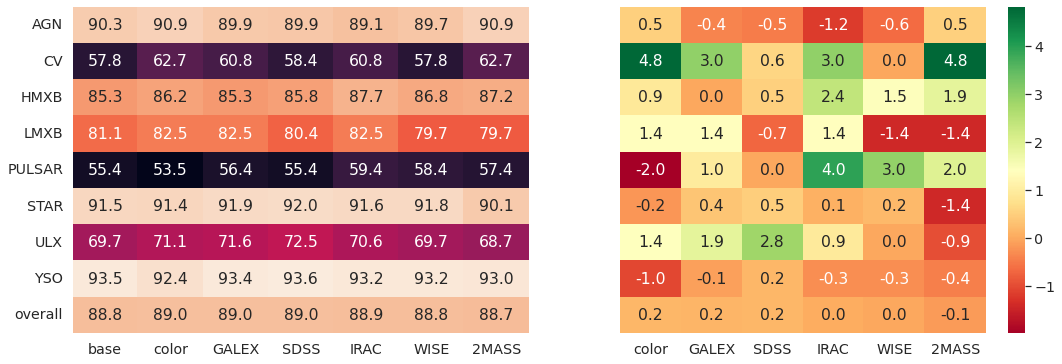

In [8]:
fig , ax = plt.subplots(nrows=1, ncols=2, figsize = (18,6) , sharey=True,)
axn = ax[0]
sns.heatmap(mat*100 , annot=True , fmt='.1f' , ax=axn,xticklabels= feat_to_drop_plot , yticklabels=cl ,cbar=False)
#ax.set_title('Random forest')
axn.tick_params(axis='y', rotation=0)

axn = ax[1]
sns.heatmap(np.asarray(mat_diff)[:,1:]*100 , annot=True , fmt='.1f' , ax=axn,xticklabels= feat_to_drop_plot[1:] , yticklabels=cl , cbar=True ,cmap='RdYlGn')
axn.tick_params(axis='y', rotation=0)

plt.savefig('plots/imp_study/feat_impotance_mode_imp.jpg')
plt.show()

In [23]:
clf = res_final['clf']
feat_imp = pd.DataFrame({
    'feat' : data.drop(columns=['class']).columns.to_list() , 
    'imp' : clf.feature_importances_
}).sort_values(by = 'imp' , ascending=False).reset_index(drop=True)
feat_imp

,feat,imp
0,J,0.196910
1,gal_b2,0.182844
2,W1,0.138173
3,g-sdss,0.126494
4,J-H,0.092016
5,gal_l2,0.064559
6,G,0.045330
7,0p3_8_csc,0.020056
8,u-csc,0.019625
9,3.6 microns (IRAC),0.019316


### Result

![imp](plots/imp_study/feat_impotance_mode_imp.jpg)

## Permutation feature Importance

### Analysis

In [23]:
from utilities import deets
from choices import get_train_data , param_dict
classes = ['AGN' ,'STAR' , 'YSO' ,  'CV' , 'LMXB' , 'HMXB' ,'ULX','PULSAR']
flag = {
    'conf_flag' : 0 , 
    'streak_src_flag' : 0 , 
    'extent_flag' : 0 , 
    'pileup_flag' : 0 , 
    }
ret_dict= {
 'clf': True,
 'prob_table': False,
 'acc': True,
 'pr_score': True,
 'precision': True,
 'recall': True , 
 'roc_auc_score' : True
 }
from tqdm import tqdm
from utilities import cv
from sklearn.ensemble import GradientBoostingClassifier

file = f'compiled_data_v3/imputed_data_v2/x_phot_minmax_modeimp.csv'
data = get_train_data(flags = flag, classes= classes , offset = 1, file=file)
from utilities import feature_imp

offset:  	0.000|1.010
singinficance:  1.000|267.938


In [99]:
from utilities import feature_imp
res = feature_imp( 
    {'data' : data , 'name' : f'data_temp'}, 
    {'model' : 'GB' , 'name' :'GB'} ,
    k=10, return_score = 'f1_score', save_df=1)

Doing 10 fold cross-validation.


In [103]:
res['precision'].T

class,AGN,CV,HMXB,LMXB,PULSAR,STAR,ULX,YSO
no_permute,0.975610,0.418410,0.822194,0.847826,0.307692,0.969434,0.464286,0.918525
gal_b2,0.018213,0.218410,0.264121,0.152704,0.163961,0.142047,0.221995,0.254645
gal_l2,0.012315,0.203025,0.135886,0.379076,0.109219,0.036565,0.161324,0.008590
hard_hs,-0.000408,-0.000677,-0.000591,-0.006189,0.037306,-0.001088,-0.016943,-0.005152
hard_hm,-0.000441,-0.005960,0.005381,0.012112,-0.000389,0.000023,0.015568,-0.004552
hard_ms,-0.000484,0.001743,0.004473,0.001111,0.010131,0.001570,0.012875,-0.000580
var_inter_prob_b,0.000011,-0.005960,0.000586,0.006099,0.006105,0.001509,0.000000,0.000576
var_inter_sigma_b,0.000474,-0.003277,0.004584,-0.023142,-0.022151,0.000377,0.003247,0.000297
var_intra_prob_b,0.000824,-0.003721,-0.009641,0.057286,-0.007816,0.000778,0.004739,-0.000070
var_inter_index_b,-0.000430,-0.004354,0.001584,-0.016836,0.008723,0.000424,-0.007233,0.000576


In [107]:
pres = res['precision'].T.iloc[1:,:]
pres

class,AGN,CV,HMXB,LMXB,PULSAR,STAR,ULX,YSO
gal_b2,0.018213,0.218410,0.264121,0.152704,0.163961,0.142047,0.221995,0.254645
gal_l2,0.012315,0.203025,0.135886,0.379076,0.109219,0.036565,0.161324,0.008590
hard_hs,-0.000408,-0.000677,-0.000591,-0.006189,0.037306,-0.001088,-0.016943,-0.005152
hard_hm,-0.000441,-0.005960,0.005381,0.012112,-0.000389,0.000023,0.015568,-0.004552
hard_ms,-0.000484,0.001743,0.004473,0.001111,0.010131,0.001570,0.012875,-0.000580
var_inter_prob_b,0.000011,-0.005960,0.000586,0.006099,0.006105,0.001509,0.000000,0.000576
var_inter_sigma_b,0.000474,-0.003277,0.004584,-0.023142,-0.022151,0.000377,0.003247,0.000297
var_intra_prob_b,0.000824,-0.003721,-0.009641,0.057286,-0.007816,0.000778,0.004739,-0.000070
var_inter_index_b,-0.000430,-0.004354,0.001584,-0.016836,0.008723,0.000424,-0.007233,0.000576
kp_intra_prob_b,-0.000473,0.011152,0.002522,0.040930,0.002608,0.000767,-0.002820,0.002214


In [ ]:
sns.heatmap()

In [1]:
from utilities import calc_score
calc_score(res['true_class'] , res['pred_class_original'])


offset:  	0.000|9.999
singinficance:  0.870|267.938
offset:  	0.000|2.010
singinficance:  3.000|267.938


NameError: name 'res' is not defined

# Check Results

In [165]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt 
from IPython.display import display
from tqdm import tqdm_notebook
import tqdm
import seaborn as sns

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import  IterativeImputer 
from sklearn.impute import SimpleImputer , KNNImputer
from sklearn.preprocessing import Normalizer
sns.set(font_scale=1.3, rc={'axes.facecolor':'white', 'figure.facecolor':'white' , 'axes.grid':True} , style="whitegrid")

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [166]:
%%time
from utilities import deets
from choices import get_train_data , param_dict
classes = ['AGN' ,'STAR' , 'YSO' ,  'CV' , 'LMXB' , 'HMXB' ,'ULX','PULSAR']
flag = {
    'conf_flag' : 0 , 
    'streak_src_flag' : 0 , 
    'extent_flag' : 0 , 
    'pileup_flag' : 0 , 
    }
ret_dict= {
    'clf': True,
 'prob_table': True,
 'acc': True,
 'pr_score': True,
 'precision': True,
 'recall': True , 
 'roc_auc_score' : True
 }

CPU times: user 18 µs, sys: 1 µs, total: 19 µs
Wall time: 21.2 µs


In [4]:
# 
feat_to_drop = param_dict['hardness']+param_dict['IRAC']

In [228]:
d = '1iter_rfimp'
file = f'compiled_data_v3/imputed_data_v2/x_phot_minmax_{d}imp.csv'
data = get_train_data(flags = flag, classes= classes , offset = 1, file=file)
data = data.drop(columns = feat_to_drop)
deets(data,0)


offset:  	0.000|1.010
singinficance:  1.000|267.938
_____________________________________________________
------------------------------
Number of Objects : 7703
Number of Columns : 42
_____________________________________________________


In [229]:
from utilities import cv
from sklearn.ensemble import GradientBoostingClassifier , RandomForestClassifier
gb = GradientBoostingClassifier()
# {'max_depth': 30, 'n_estimators': 400} for MODE imputation
# {'max_depth': 180, 'n_estimators': 400} for RF imputation
rf = RandomForestClassifier(n_estimators=400 , max_depth=30 , n_jobs=-1)
res_final  = cv(
    {'data' : data , 'name' : f'data_10iter_rfimp_tuned'},   
    {'model' : rf , 'name' :'RF'} ,
    k=10 , return_dict = ret_dict, save_df= 'temp_res_comp/train_prob/1iter-rfimp_RF.csv' , multiprocessing = False)

Doing 10 fold cross-validation


100%|██████████| 10/10 [03:39<00:00, 21.95s/it]


[RESULT] Overall Accuracy : 0.89
[INFO] Validation probability table is available as ['prob_table'] in response
>>> Training the final classifier RandomForestClassifier(max_depth=30, n_estimators=400, n_jobs=-1)
[DONE] Classifier is trained | acces via ['clf'] in the response


In [230]:
res_final['prob_table']

,true_class,pred_class,pred_prob,prob_AGN,prob_CV,prob_HMXB,prob_LMXB,prob_PULSAR,prob_STAR,prob_ULX,prob_YSO
name,,,,,,,,,,,
2CXO J100014.0+022838,AGN,AGN,0.9775,0.9775,0.0050,0.0150,0.0000,0.0000,0.0000,0.0025,0.0000
2CXO J104436.8-600112,STAR,STAR,0.9950,0.0000,0.0000,0.0000,0.0000,0.0000,0.9950,0.0000,0.0050
2CXO J203413.2+410345,YSO,YSO,0.9975,0.0000,0.0000,0.0000,0.0000,0.0000,0.0025,0.0000,0.9975
2CXO J053500.2-051558,STAR,STAR,0.8900,0.0250,0.0200,0.0150,0.0025,0.0025,0.8900,0.0050,0.0400
2CXO J064041.0+093357,STAR,STAR,0.7725,0.0100,0.0125,0.0100,0.0075,0.0200,0.7725,0.0100,0.1575
...,...,...,...,...,...,...,...,...,...,...,...
2CXO J084825.2+444808,AGN,AGN,0.9575,0.9575,0.0000,0.0350,0.0000,0.0000,0.0050,0.0025,0.0000
2CXO J162038.2-530159,STAR,STAR,0.9850,0.0025,0.0050,0.0025,0.0000,0.0000,0.9850,0.0025,0.0025
2CXO J064058.1+095235,STAR,STAR,0.9150,0.0000,0.0075,0.0025,0.0025,0.0125,0.9150,0.0000,0.0600


### ROC-AUC Curve

In [248]:
[c for c in classes]

['AGN', 'STAR', 'YSO', 'CV', 'LMXB', 'HMXB', 'ULX', 'PULSAR']

In [250]:
from sklearn.metrics import roc_curve 
y_true = res_final['prob_table']['true_class']
prob_c = [f'prob_{c}' for c in classes]
y_score = res_final['prob_table'][prob_c]
fpr , tpr , threshold = {} , {} , {} 
for c in classes:
    fpr[c] , tpr[c] , threshold[c] = roc_curve(y_true , y_score[f'prob_{c}'] , )

/home/kumaran/.local/lib/python3.6/site-packages/sklearn/metrics/_ranking.py:705: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



TypeError: 'bool' object is not subscriptable

In [264]:
res_final['prob_table']['true_class'].value_counts()

0    7703
Name: true_class, dtype: int64

In [258]:
r = res_final['prob_table']
cl = 'PULSAR'
r['true_class'] = [1 if el == cl else 0 for el in r['true_class']]
r

,true_class,pred_class,pred_prob,prob_AGN,prob_CV,prob_HMXB,prob_LMXB,prob_PULSAR,prob_STAR,prob_ULX,prob_YSO
name,,,,,,,,,,,
2CXO J100014.0+022838,0,AGN,0.9775,0.9775,0.0050,0.0150,0.0000,0.0000,0.0000,0.0025,0.0000
2CXO J104436.8-600112,0,STAR,0.9950,0.0000,0.0000,0.0000,0.0000,0.0000,0.9950,0.0000,0.0050
2CXO J203413.2+410345,0,YSO,0.9975,0.0000,0.0000,0.0000,0.0000,0.0000,0.0025,0.0000,0.9975
2CXO J053500.2-051558,0,STAR,0.8900,0.0250,0.0200,0.0150,0.0025,0.0025,0.8900,0.0050,0.0400
2CXO J064041.0+093357,0,STAR,0.7725,0.0100,0.0125,0.0100,0.0075,0.0200,0.7725,0.0100,0.1575
...,...,...,...,...,...,...,...,...,...,...,...
2CXO J084825.2+444808,0,AGN,0.9575,0.9575,0.0000,0.0350,0.0000,0.0000,0.0050,0.0025,0.0000
2CXO J162038.2-530159,0,STAR,0.9850,0.0025,0.0050,0.0025,0.0000,0.0000,0.9850,0.0025,0.0025
2CXO J064058.1+095235,0,STAR,0.9150,0.0000,0.0075,0.0025,0.0025,0.0125,0.9150,0.0000,0.0600


In [259]:
fpr , tpr , threshold = roc_curve(r['true_class'] , r[f'prob_{cl}'], )

/home/kumaran/.local/lib/python3.6/site-packages/sklearn/metrics/_ranking.py:951: UndefinedMetricWarning:

No positive samples in y_true, true positive value should be meaningless



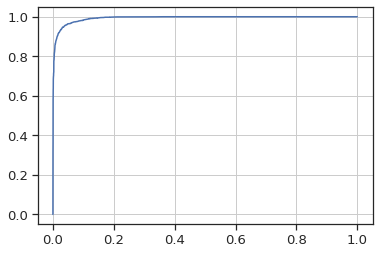

In [257]:
plt.plot(fpr, tpr)
plt.show()

### Prob table

In [231]:
res_final['prob_table']

,true_class,pred_class,pred_prob,prob_AGN,prob_CV,prob_HMXB,prob_LMXB,prob_PULSAR,prob_STAR,prob_ULX,prob_YSO
name,,,,,,,,,,,
2CXO J100014.0+022838,AGN,AGN,0.9775,0.9775,0.0050,0.0150,0.0000,0.0000,0.0000,0.0025,0.0000
2CXO J104436.8-600112,STAR,STAR,0.9950,0.0000,0.0000,0.0000,0.0000,0.0000,0.9950,0.0000,0.0050
2CXO J203413.2+410345,YSO,YSO,0.9975,0.0000,0.0000,0.0000,0.0000,0.0000,0.0025,0.0000,0.9975
2CXO J053500.2-051558,STAR,STAR,0.8900,0.0250,0.0200,0.0150,0.0025,0.0025,0.8900,0.0050,0.0400
2CXO J064041.0+093357,STAR,STAR,0.7725,0.0100,0.0125,0.0100,0.0075,0.0200,0.7725,0.0100,0.1575
...,...,...,...,...,...,...,...,...,...,...,...
2CXO J084825.2+444808,AGN,AGN,0.9575,0.9575,0.0000,0.0350,0.0000,0.0000,0.0050,0.0025,0.0000
2CXO J162038.2-530159,STAR,STAR,0.9850,0.0025,0.0050,0.0025,0.0000,0.0000,0.9850,0.0025,0.0025
2CXO J064058.1+095235,STAR,STAR,0.9150,0.0000,0.0075,0.0025,0.0025,0.0125,0.9150,0.0000,0.0600


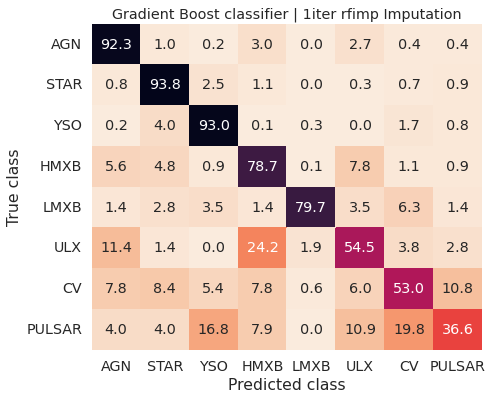

In [232]:
from utilities import plot_cf
plot_dict_def = {
    'title' : False , 
    'font_scale' : 1.2 ,
    'cbar' : False ,
    'plot_num' : 0,
}
fig , ax = plt.subplots(nrows=1 , ncols=1 , figsize=(7,6))
plot_cf([res_final['prob_table']] , plot_dict=plot_dict_def , confidance=0. , ax=ax)
plt.title('Gradient Boost classifier | 1iter rfimp Imputation')
plt.savefig('temp_res_comp/cf/RF_1iter_rf.png')
plt.show()

In [233]:
from utilities import get_score
score = get_score([res_final['prob_table']])
score

{'classes': array(['AGN', 'CV', 'HMXB', 'LMXB', 'PULSAR', 'STAR', 'ULX', 'YSO'],
       dtype=object),
 'num_src':         pred_class
 STAR          2746
 AGN           2319
 YSO           1180
 HMXB           767
 ULX            271
 CV             181
 LMXB           125
 PULSAR         114,
 'balanced_accuracy': 0.7270013538418922,
 'accuracy': 0.8875762689861093,
 'precision': 0.8942151279106503,
 'recall': 0.8875762689861093,
 'f1': 0.8904478415816571,
 'class_scores':         recall_score  precision_score  f1_score
 class                                          
 AGN         0.922756         0.952997  0.937633
 CV          0.530120         0.486188  0.507205
 HMXB        0.787433         0.767927  0.777558
 LMXB        0.797203         0.912000  0.850746
 PULSAR      0.366337         0.324561  0.344186
 STAR        0.937634         0.952658  0.945087
 ULX         0.545024         0.424354  0.477178
 YSO         0.929504         0.905085  0.917132}

In [234]:
train_res = pd.read_csv('temp_res_comp/train_prob/1iter-rfimp_RF.csv' , index_col='name')
train_res

,true_class,pred_class,pred_prob,prob_AGN,prob_CV,prob_HMXB,prob_LMXB,prob_PULSAR,prob_STAR,prob_ULX,prob_YSO
name,,,,,,,,,,,
2CXO J100014.0+022838,AGN,AGN,0.9775,0.9775,0.0050,0.0150,0.0000,0.0000,0.0000,0.0025,0.0000
2CXO J104436.8-600112,STAR,STAR,0.9950,0.0000,0.0000,0.0000,0.0000,0.0000,0.9950,0.0000,0.0050
2CXO J203413.2+410345,YSO,YSO,0.9975,0.0000,0.0000,0.0000,0.0000,0.0000,0.0025,0.0000,0.9975
2CXO J053500.2-051558,STAR,STAR,0.8900,0.0250,0.0200,0.0150,0.0025,0.0025,0.8900,0.0050,0.0400
2CXO J064041.0+093357,STAR,STAR,0.7725,0.0100,0.0125,0.0100,0.0075,0.0200,0.7725,0.0100,0.1575
...,...,...,...,...,...,...,...,...,...,...,...
2CXO J084825.2+444808,AGN,AGN,0.9575,0.9575,0.0000,0.0350,0.0000,0.0000,0.0050,0.0025,0.0000
2CXO J162038.2-530159,STAR,STAR,0.9850,0.0025,0.0050,0.0025,0.0000,0.0000,0.9850,0.0025,0.0025
2CXO J064058.1+095235,STAR,STAR,0.9150,0.0000,0.0075,0.0025,0.0025,0.0125,0.9150,0.0000,0.0600


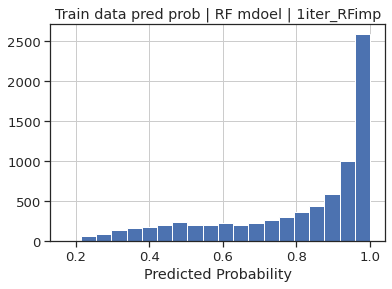

In [235]:
plt.hist(train_res['pred_prob'] , bins=20)
plt.title('Train data pred prob | RF mdoel | 1iter_RFimp')
plt.xlabel('Predicted Probability')
plt.savefig('temp_res_comp/train_prob_dist/RF_1iter_rf_prob.jpg')
plt.show()

In [236]:
#
feat_to_drop = param_dict['hardness']+param_dict['IRAC']

### prediction on new sources

In [237]:
u = pd.read_csv('compiled_data_v3/imputed_data_v2/unid_phot_minmax__1iter_rfimp_imp.csv' , index_col='name').iloc[:,1:]
u = u.drop(columns=feat_to_drop)
deets(u)

_____________________________________________________
------------------------------
Number of Objects : 39893
Number of Columns : 41
_____________________________________________________


In [238]:
from utilities import softmax , norm_prob
clf = res_final['clf']
pred_prob = (clf.predict_proba(u))
pred_prob_df = pd.DataFrame(pred_prob , columns=[f'prob_{el}' for el in clf.classes_] , index = u.index.to_list())
pred_prob_df

,prob_AGN,prob_CV,prob_HMXB,prob_LMXB,prob_PULSAR,prob_STAR,prob_ULX,prob_YSO
2CXO J004829.5-732959,0.0850,0.1425,0.3400,0.0400,0.0500,0.1925,0.1175,0.0325
2CXO J005449.0-725128,0.1525,0.0700,0.4900,0.0075,0.0500,0.0525,0.1775,0.0000
2CXO J010049.1-731526,0.1625,0.0475,0.5375,0.0050,0.0500,0.1050,0.0925,0.0000
2CXO J010049.8-731045,0.1500,0.0300,0.5275,0.0125,0.0125,0.1725,0.0775,0.0175
2CXO J010647.7-730940,0.1050,0.1700,0.1175,0.0200,0.0450,0.4200,0.0275,0.0950
...,...,...,...,...,...,...,...,...
2CXO J220433.1-495916,0.1375,0.1375,0.2425,0.0275,0.1200,0.0750,0.2575,0.0025
2CXO J220508.3-495935,0.1250,0.1925,0.3550,0.0275,0.0325,0.0350,0.2325,0.0000
2CXO J220544.0-495505,0.1600,0.2000,0.3325,0.0150,0.0425,0.0700,0.1800,0.0000
2CXO J220555.6-500837,0.3050,0.0950,0.1625,0.0650,0.1125,0.0575,0.0800,0.1225


In [239]:
u_df = pd.DataFrame({
    'name' : u.index.to_list() , 
    'class' : clf.predict(u) , 
    'prob' : [np.amax(el) for el in pred_prob] ,
    #'prob_margin' : [el[-1]-el[-2] for el in np.sort(pred_prob , axis=1 ,)]
}).set_index('name')
u_df = pd.merge(u_df , pred_prob_df , left_index=True , right_index=True)
u_df.index.name = 'name'
u_df 

,class,prob,prob_AGN,prob_CV,prob_HMXB,prob_LMXB,prob_PULSAR,prob_STAR,prob_ULX,prob_YSO
name,,,,,,,,,,
2CXO J004829.5-732959,HMXB,0.3400,0.0850,0.1425,0.3400,0.0400,0.0500,0.1925,0.1175,0.0325
2CXO J005449.0-725128,HMXB,0.4900,0.1525,0.0700,0.4900,0.0075,0.0500,0.0525,0.1775,0.0000
2CXO J010049.1-731526,HMXB,0.5375,0.1625,0.0475,0.5375,0.0050,0.0500,0.1050,0.0925,0.0000
2CXO J010049.8-731045,HMXB,0.5275,0.1500,0.0300,0.5275,0.0125,0.0125,0.1725,0.0775,0.0175
2CXO J010647.7-730940,STAR,0.4200,0.1050,0.1700,0.1175,0.0200,0.0450,0.4200,0.0275,0.0950
...,...,...,...,...,...,...,...,...,...,...
2CXO J220433.1-495916,ULX,0.2575,0.1375,0.1375,0.2425,0.0275,0.1200,0.0750,0.2575,0.0025
2CXO J220508.3-495935,HMXB,0.3550,0.1250,0.1925,0.3550,0.0275,0.0325,0.0350,0.2325,0.0000
2CXO J220544.0-495505,HMXB,0.3325,0.1600,0.2000,0.3325,0.0150,0.0425,0.0700,0.1800,0.0000


In [240]:
u_df.to_csv('temp_res_comp/unid_prob/RF_1iter_rfimp.csv')

In [241]:
u_df = pd.read_csv('temp_res_comp/unid_prob/RF_1iter_rfimp.csv')

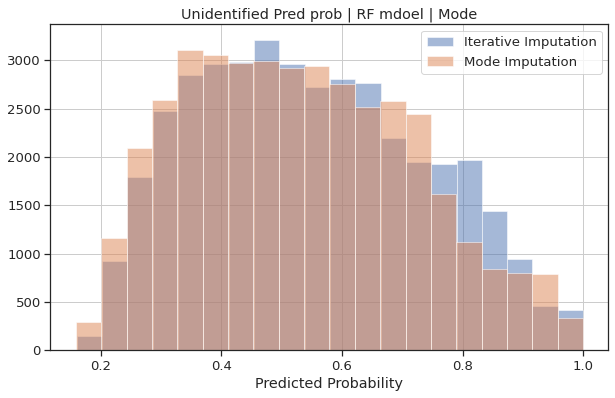

In [95]:
plt.figure(figsize=(10,6))
u_df = pd.read_csv('temp_res_comp/unid_prob/rf_rf.csv')
plt.hist(u_df['prob'] , bins=20 , label='Iterative Imputation', alpha=0.5)
u_df = pd.read_csv('temp_res_comp/unid_prob/rf_mode.csv')
plt.hist(u_df['prob'] , bins=20 , label='Mode Imputation' , alpha=0.5)
plt.legend()
plt.title('Unidentified Pred prob | RF mdoel | Mode')
plt.xlabel('Predicted Probability')
plt.savefig('temp_res_comp/unid_all_prob_dist.jpg')
plt.show()      

In [242]:
u_df['class'].value_counts()

STAR      10570
YSO        9949
HMXB       8835
AGN        7938
ULX        1607
CV          546
LMXB        245
PULSAR      203
Name: class, dtype: int64

In [245]:
u_df_th = u_df[u_df['prob']>0.8]
print(u_df_th['class'].value_counts().to_markdown())

|      |   class |
|:-----|--------:|
| STAR |    2620 |
| YSO  |     767 |
| AGN  |     601 |
| HMXB |     599 |
| LMXB |      23 |
| CV   |       7 |


In [244]:
from numpy.random import normal
from ridgeplot import ridgeplot
cl = classes[::-1]
sample = [u_df[u_df['class']==c]['prob'] for c in cl]
fig = ridgeplot(
    samples=sample,
    kde_points=np.linspace(0, 1, 500),
    colorscale="inferno",
    colormode="index",
    coloralpha=0.6,
    labels=cl,
    spacing = 3 / 8,
    xpad=0
)
fig.update_layout(
    title="Unidentified sources | Regression 10RF Imputation | GB classifier",
    height=550,
    width=600,
    plot_bgcolor="rgba(255, 255, 255, 0.0)",
    xaxis_gridcolor="rgba(0, 0, 0, 0.1)",
    yaxis_gridcolor="rgba(0, 0, 0, 0.1)",
    xaxis_title="Predicted Probability",
    yaxis_title="Predicted Probability Density",
)

#fig.save('temp.png')
#fig.write_image('temp_res_comp/unid_prob_dist/rf_mode.jpg')
fig.show()

# Hyper-param tuning

### Import library

In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt 
from IPython.display import display
from tqdm import tqdm_notebook
import tqdm
import seaborn as sns

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import  IterativeImputer 
from sklearn.impute import SimpleImputer , KNNImputer
from sklearn.preprocessing import Normalizer
sns.set(font_scale=1.3, rc={'axes.facecolor':'white', 'figure.facecolor':'white' , 'axes.grid':True} , style="whitegrid")

%load_ext autoreload
%autoreload 2

In [3]:
from utilities import deets
from choices import param_dict

In [5]:
id_frame = pd.read_csv('compiled_data_v3/id_frame.csv' , index_col='name')
to_drop = param_dict['IRAC']+param_dict['hardness']
df = pd.read_csv('compiled_data_v3/imputed_data_v2/x_phot_minmax_forestimp.csv' , index_col='name')
x_col = df.columns.to_list()
df = pd.merge(id_frame , df , left_index=True , right_index=True)
df = df[df['offset']<1.01]
xrf = df[x_col].drop(columns=to_drop)
deets(xrf)
yrf = df['class']

df = pd.read_csv('compiled_data_v3/imputed_data_v2/x_phot_minmax_modeimp.csv' , index_col='name')
x_col = df.columns.to_list()
df = pd.merge(id_frame , df , left_index=True , right_index=True)
df = df[df['offset']<1.01]
deets(xrf)
xmod = df[x_col].drop(columns=to_drop)
ymod = df['class']

_____________________________________________________
------------------------------
Number of Objects : 7703
Number of Columns : 42
_____________________________________________________
_____________________________________________________
------------------------------
Number of Objects : 7703
Number of Columns : 42
_____________________________________________________


# Lightcurve

In [1]:
import pandas as pd 


%load_ext autoreload
%autoreload 2


In [5]:
df_id = pd.read_csv('compiled_data_v3/id_frame.csv' , index_col='name')
df_id = df_id[df_id['class']=='AGN']
df_id = df_id[df_id['significance']>5]
df_id = df_id.query("streak_src_flag==0 and pileup_flag==0 and conf_flag==0 and sat_src_flag==0")
df_id 

,catalog,class,significance,cat_name,var_flag,streak_src_flag,pileup_flag,ra,dec,offset,missing,sat_src_flag,extent_flag,conf_flag,cat_ra,cat_dec
name,,,,,,,,,,,,,,,,
2CXO J163618.1+410038,VERONCAT,AGN,5.028571,ELAIS J16363+4100,0,0,0,249.075798,41.010605,0.018596,0.415385,0,0,0,249.0758,41.0106
2CXO J125955.6+124153,VERONCAT,AGN,6.437123,SDSS J12599+1241A,0,0,0,194.981710,12.698296,0.039502,0.230769,0,0,0,194.9817,12.6983
2CXO J151451.3+552602,VERONCAT,AGN,9.080575,SDSS J15148+5526,0,0,0,228.713786,55.433908,0.041903,0.169231,0,0,0,228.7138,55.4339
2CXO J003516.1-432451,VERONCAT,AGN,5.497484,XMM J00352-4324,0,0,0,8.817118,-43.414398,0.046497,0.184615,0,0,0,8.8171,-43.4144
2CXO J032754.1+023342,VERONCAT,AGN,32.950495,3C 88.0,0,0,0,51.975813,2.561700,0.046562,0.169231,0,0,0,51.9758,2.5617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2CXO J005801.6-275316,VERONCAT,AGN,8.882853,RXS J00580-2753,0,0,0,14.507082,-27.887856,9.135044,0.369231,0,0,0,14.5054,-27.8858
2CXO J150628.7+554538,VERONCAT,AGN,5.851852,NGC 5866#1,0,0,0,226.619791,55.760764,9.369553,0.415385,0,0,0,226.6183,55.7583
2CXO J171746.0+643139,VERONCAT,AGN,5.085714,RX J17177+6431,0,0,0,259.441954,64.527611,9.373544,0.353846,0,0,0,259.4479,64.5281


In [6]:
df_id['var_flag'].value_counts()

0    2447
1     529
Name: var_flag, dtype: int64

In [10]:
df_time = pd.read_csv('flags/chandra_all_time_flags.csv' , index_col='name')
df_time

,ra,dec,var_flag,significance,acis_num,acis_hetg_num,acis_letg_num,hrc_num,hrc_hetg_num,hrc_letg_num,acis_time,acis_hetg_time,acis_letg_time,hrc_time,hrc_hetg_time,hrc_letg_time
name,,,,,,,,,,,,,,,,
2CXO J003935.9-732725,9.899767,-73.457136,0,3.294118,1,0,0,0,0,0,44766.427639,NaN,NaN,NaN,NaN,NaN
2CXO J003936.7-731249,9.903193,-73.213742,0,4.157895,1,0,0,0,0,0,44766.427639,NaN,NaN,NaN,NaN,NaN
2CXO J004028.7-731106,10.119748,-73.185171,0,14.422175,1,0,0,0,0,0,49407.804801,NaN,NaN,NaN,NaN,NaN
2CXO J004501.0-730958,11.254322,-73.166239,0,15.667675,1,0,0,0,0,0,74219.215402,NaN,NaN,NaN,NaN,NaN
2CXO J004506.3-730056,11.276413,-73.015666,0,10.447263,1,0,0,0,0,0,74228.815165,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2CXO J220613.7-495727,331.557273,-49.957521,0,4.057143,2,0,0,0,0,0,12309.872255,NaN,NaN,NaN,NaN,NaN
2CXO J220614.6-500951,331.560853,-50.164421,0,3.885714,2,0,0,0,0,0,12313.072206,NaN,NaN,NaN,NaN,NaN
2CXO J220618.4-500554,331.577082,-50.098537,0,4.457143,2,0,0,0,0,0,12313.072206,NaN,NaN,NaN,NaN,NaN


In [22]:
df = pd.merge(df_id[['class' , 'cat_name' ,'var_flag' ]] , df_time[['ra' ,'dec' ,'acis_time' ,'acis_num' ,'hrc_time' ,'hrc_num']] , left_index=True , right_index=True , how='left')
df = df.sort_values(by='acis_time' , ascending=False)
df 

,class,cat_name,var_flag,ra,dec,acis_time,acis_num,hrc_time,hrc_num
name,,,,,,,,,
2CXO J033203.0-274450,AGN,CDFS J03320-2744,1,53.012656,-27.747377,6.048154e+06,85,NaN,0
2CXO J033210.9-274343,AGN,CDFS J03321-2743,1,53.045438,-27.728739,6.048079e+06,85,NaN,0
2CXO J033241.8-275202,AGN,ECDF-S 475,1,53.174426,-27.867440,5.826097e+06,84,NaN,0
2CXO J033244.3-275251,AGN,ECDF-S 471,1,53.184679,-27.881018,5.826097e+06,84,NaN,0
2CXO J033252.8-275120,AGN,CDFS J03328-2751,1,53.220368,-27.855560,5.826097e+06,84,NaN,0
...,...,...,...,...,...,...,...,...,...
2CXO J024214.9-000210,AGN,SDSS J02422-0002,0,40.562474,-0.036188,NaN,0,39736.574609,1
2CXO J141916.3+542943,AGN,CRSS 1419.2+5429,0,214.818192,54.495279,NaN,0,20018.022306,1
2CXO J142009.5+542639,AGN,CRSS 1420.1+5426,0,215.039792,54.444285,NaN,0,20018.022306,1


In [23]:
df.to_csv('flags/AGN_flags.csv')

In [35]:
import os 
os.system('ls data_products > temp.csv')
df_lc = pd.read_csv('temp.csv' ,  names=['name'])
df_lc = df_lc.replace('2CXO' , '2CXO ' , regex=True).set_index("name")
os.system('rm temp.csv')
df_lc = pd.merge(df_lc , df , left_index=True , right_index = True , how='left')
df_lc = (df_lc
    .drop(columns=['hrc_time' , 'hrc_num'])
    .rename(columns={'acis_time' : 'Total ACIS exposure' , 'acis_num' : 'Num of ACIS obs'})
    )
df_lc

,class,cat_name,var_flag,ra,dec,Total ACIS exposure,Num of ACIS obs
name,,,,,,,
2CXO J032754.1+023342,AGN,3C 88.0,0,51.975813,2.561700,1.152835e+05,4
2CXO J033203.0-274450,AGN,CDFS J03320-2744,1,53.012656,-27.747377,6.048154e+06,85
2CXO J100044.4+025324,AGN,COSM J10007+0253,0,150.185094,2.890052,9.914905e+04,3
2CXO J100049.9+020500,AGN,COSM J10008+0205,1,150.207964,2.083337,1.932429e+05,6
2CXO J105344.9+572840,AGN,1WGA J1053.7+5728,0,163.437108,57.477789,1.057972e+05,4
2CXO J125311.8-091337,AGN,CXOCY J12531-0913,1,193.299484,-9.227185,1.278504e+05,3
2CXO J134105.1+395945,AGN,RXS J13410+3959,0,205.271315,39.995982,4.699386e+04,1
2CXO J141119.4+521400,AGN,CXO J14113+5214,0,212.831220,52.233460,9.094824e+04,1
2CXO J141123.4+521331,AGN,CXO J14113+5213,1,212.847646,52.225478,9.094824e+04,1


In [38]:
(df_lc.to_csv('notes/AGN_lc_info.csv'))